## Poyecto 2. simple K-nearest neighbor

<p>Se implementara la regresion k-nearest neightbor y tecnicas de clasificación con la libreria Scikit-Learn </p>

<p>Los pasos a seguir son los siguientes:</p>

<ol>
    <li>Se cargará los datos a estudiar.</li>
    <li>Se inicializará K escogiendola nosotros</li>
    <li>Para cada ejemplo en los datos tendremos: i) Calcular la distancia entre el ejemplo de consulta y el ejemplo actual de los datos y ii) Se añadira la distancia y el indice del ejemplo a una colección ordenada.</li>
    <li>Se ordanará la ya ordenada coleccion de distancias e indices del mas pequeño al mas grande de las distancias.</li>
    <li>Se escogerá la primera entrada K de la coleccion acomodada.</li>
    <li>Se tomaran las etiquetas de la entrada K</li>
    <li>Si es regresion, devolverá la media de las K</li>
    <li>Si es Clasificación, entonces regresara la moda de los K</li>
</ol>


Utilizaremos el conjunto de datod 'Iris data set' El cual es uno de los primeros conjuntos de datos conocidos para la evaluacion de clasificacion. Es un conjunto pequeño del año 1936.

Tenemos la siguiente descripcion tomada de: https://doi.org/10.24432/C56C76,

'This is one of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are not linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick,  spchadwick@espeedaz.net ).  The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.  '

Importemos las librerias necesarias para el proyecto

In [18]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 1.4 MB/s eta 0:00:08
   ---------------------------------------- 0.1/10.9 MB 1.1 MB/s eta 0:00:11
   ---------------------------------------- 0.1/10.9 MB 1.0 MB/s eta 0:00:11
    --------------------------------------- 0.2/10.9 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.3/10.9 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.3/10.9 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.4/10.9 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.4/10.9 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.4/10.9 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.4/10.9 MB 984.2 kB/s eta 0:00:11
   - -------------------------------------- 0.5/10.9 MB 973.2 kB/s eta 0:00:11
   -- ------------------------------------- 0.6/10.9 MB 1.0 MB/s eta 0:00:11
  


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
URL = ('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
iris_df = pd.read_csv(URL)

In [5]:
iris_df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Vemos que las columnas no tienen nombre, así que vamos a agregarselos.

In [7]:
nombres_columnas = ['sepal-length', 'sepal-width', 'petal-lenght', 'petal-width', 'Class']
iris_df = pd.read_csv(URL, names = nombres_columnas)

In [8]:
iris_df.head()

,sepal-length,sepal-width,petal-lenght,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Ahora separemos este conjunto de datos en sus atributos y la clasificacion que queremos predecir al final,

In [9]:
X = iris_df.iloc[:,:-1].values
y = iris_df.iloc[:,4].values

In [12]:
X.shape

(150, 4)

In [13]:
y.shape

(150,)

Ahora vamos a dividir nuestro conjunto de datos en dos partes, una para entrenar nuestro modelo de KNN y otro para testear el modelo cuando se entrene con nuestros datos. Para ello, utilizaremos el 'train_test_split' de sci kit learn. En este caso, utilizaremos solo el 20% de los datos para probar o testear nuestro modelo entrenado.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Y para normalizar nuestros datos, importamos StandardScaler. Esto nos permite transformar las caracteristicas de un conjunto de datos para que tengan una distribucion normal estandar, con una media de 0 y una desviación estandar de 1.

In [21]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

Podemos ver que se ha creado un objeto que normaliza los datos que dividimos para entrenar nuestro modelo. Utilizaremos el metodo transform para procesar estos datos normalizados y obtener lo que en estadistica se conoce como puntuación z o estandar.

In [25]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Ahora procedamos a trabajar con el algoritmo KNN con nuestros datos ya separados para entrenar y testear y ya normalizados.

In [27]:
from sklearn.neighbors import KNeighborsClassifier

Se escoge k = 5 como punto de partida. Esta accion es deficiente al encontrar el k. Hay metodos ya conocidos los cuales nos permiten seleccionar que k es mejor para nuestro modelo. Utilizaremos k = 5 porque es el valor mas común a utilizar primero.

In [28]:
classifier = KNeighborsClassifier(n_neighbors = 5)

In [29]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Ahora que hemos entrenado nuestro modelo, utilizaremos nuestro conjunto de prueba para testear y ver que clasificaciones son las que nos dá. Compararemos eso con el conjunto que conocemos y veremos el error.

In [30]:
y_pred = classifier.predict(X_test)

In [34]:
y_pred[0:10]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [35]:
y_test[0:10]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  8  0]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Podemos ver por nuestros f1-score que el valance de la presicion y el recall es muy buena, por lo que nuestro modelo con k = 5 es excelente para clasificar nuevas entradas en el conjunto de datos.

Vamos ahora a ver como podemos calcular k con mayor presición sin probar cada k que se nos ocurra.

In [40]:
error = []

for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

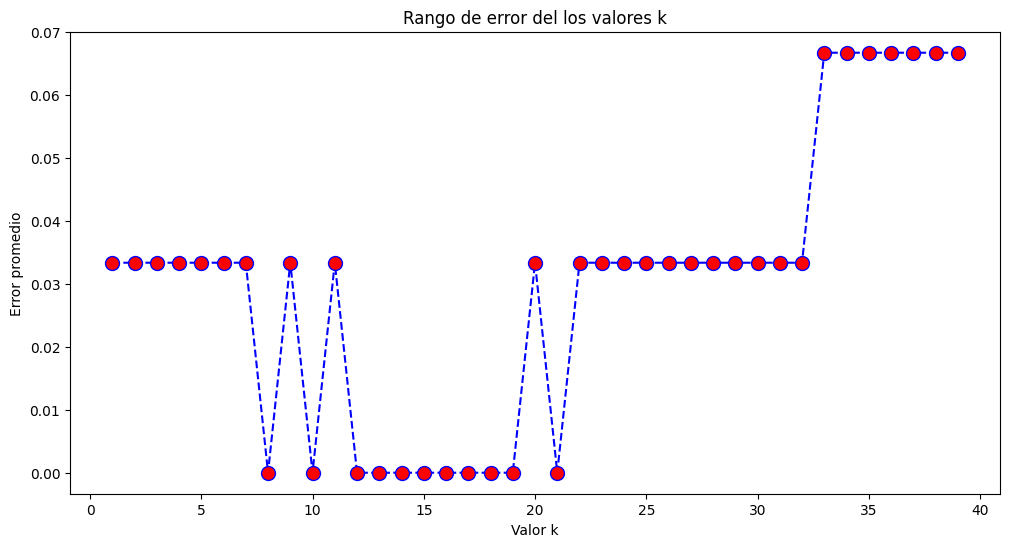

In [42]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), error, color = 'blue', linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'red', markersize = 10)
plt.title('Rango de error del los valores k')
plt.xlabel('Valor k')
plt.ylabel('Error promedio')
plt.show()

Vemos que el error promedio esta si tomamos los valores de k entre 5 y 23 aprox

## Referencias
Fisher,R. A.. (1988). Iris. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.